In [ ]:
import os

def read_text_files_from_folder(folder_path):
    # 存储所有文件内容的列表
    text_contents = []
    
    # 遍历文件夹中的所有文件
    for filename in os.listdir(folder_path):
        # 检查文件扩展名是否为 .txt
        if 1:
            # 构建文件的完整路径
            file_path = os.path.join(folder_path, filename)
            
            # 打开文件并读取内容
            with open(file_path, "r", encoding="utf-8") as file:
                content = file.read()
                # 将内容添加到列表中
                text_contents.append(content)
    
    return text_contents

# 示例用法
folder_path = ["D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AA","D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AB", \
               "D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AC","D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AD","D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AE", \
               "D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AF","D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AG",\
                "D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AH","D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AI",\
                    "D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AJ","D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AK",\
                        "D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AL","D:\DLNLP\DL-nlp2025-main\中文\wiki_zh\AM"]  # 替换为你的文件夹路径
text_contents=[]
for files in folder_path:
    text_contents = text_contents+read_text_files_from_folder(files)

print(len(text_contents))


1274


In [2]:
import jieba

def chinese_segmentation(string_list):
    # 初始化一个空列表来存储分词结果
    segmented_list = []
    i = 0
    len11=len(string_list)
    # 遍历列表中的每个字符串
    for string in string_list:
        if i % 2 ==0 :
            print(f"分词已经进行： {100*(i+1)/len11:.4f} %")
        # 使用jieba进行分词，并将结果转换为列表
        segmented_words = list(jieba.cut(string))
        # 将分词结果添加到segmented_list中
        segmented_list.append(segmented_words)
        i+=1
    
    return segmented_list


In [ ]:
import pandas as pd

# 创建一个空的 DataFrame
columns = [
    "text serial",  "total character", 
    "unigram entropy", "unigram perplexity", "bigram entropy", "bigram perplexity",
    "trigram entropy", "trigram perplexity"
]
df = pd.DataFrame(columns=columns)

# 设置第一列为数字 1 到 100
df["text serial"] = range(1, 101)

# 函数：将输入的列表覆盖到 DataFrame 的指定列中
def insert_data_to_column(df, new_column_data, column_name):
    """
    将输入的列表覆盖到 DataFrame 的指定列中。

    参数:
        df (pd.DataFrame): 目标 DataFrame。
        new_column_data (list): 要插入的新列数据。
        column_name (str): 目标列的名称。

    返回:
        pd.DataFrame: 更新后的 DataFrame。
    """
    # 检查目标列是否存在
    if column_name not in df.columns:
        raise ValueError(f"列 '{column_name}' 不存在于 DataFrame 中。")
    
    # 检查数据长度是否匹配
    if len(new_column_data) != len(df):
        raise ValueError(f"数据长度 {len(new_column_data)} 与 DataFrame 长度 {len(df)} 不匹配。")
    
    # 覆盖目标列的数据
    df[column_name] = new_column_data
    
    return df



# 打印 DataFrame
print(df.head())

   text serial word segments total character average word length  \
0            1           NaN             NaN                 NaN   
1            2           NaN             NaN                 NaN   
2            3           NaN             NaN                 NaN   
3            4           NaN             NaN                 NaN   
4            5           NaN             NaN                 NaN   

  unigram entropy unigram perplexity bigram entropy bigram perplexity  \
0             NaN                NaN            NaN               NaN   
1             NaN                NaN            NaN               NaN   
2             NaN                NaN            NaN               NaN   
3             NaN                NaN            NaN               NaN   
4             NaN                NaN            NaN               NaN   

  trigram entropy trigram perplexity  
0             NaN                NaN  
1             NaN                NaN  
2             NaN                Na

In [4]:
import re

def remove_unwanted_elements(string_list, punctuation_file="cn_punctuation.txt", stopwords_file="cn_stopwords.txt"):
    # 读取标点符号文件
    with open(punctuation_file, 'r', encoding='utf-8') as f:
        cn_punctuation = f.read().strip()
    
    # 读取停用词文件
    with open(stopwords_file, 'r', encoding='utf-8') as f:
        cn_stopwords = f.read().strip().splitlines()
    
    # 编译正则表达式，用于匹配阿拉伯数字、英文单词和标点符号
    pattern = re.compile(r'[0-9]|[a-zA-Z]|[^\u4e00-\u9fff]')
    
    # 处理每个字符串
    cleaned_list = []
    i=0
    llll=len(string_list)
    for string in string_list:
        if i%2==0:
            print(f"步骤完成：{i/llll*100} %")
        # 去除标点符号
        i+=1
        for punc in cn_punctuation:
            string = string.replace(punc, '')
        
        # 去除停用词
        for stopword in cn_stopwords:
            string = string.replace(stopword, '')
        
        # 去除阿拉伯数字、英文单词和标点符号
        string = pattern.sub('', string)
        
        # 去除多余的空格
        string = ' '.join(string.split())
        
        cleaned_list.append(string)
    
    return cleaned_list


cleaned_list = remove_unwanted_elements(text_contents[0:50])

步骤完成：0.0 %
步骤完成：4.0 %
步骤完成：8.0 %
步骤完成：12.0 %
步骤完成：16.0 %
步骤完成：20.0 %
步骤完成：24.0 %
步骤完成：28.000000000000004 %
步骤完成：32.0 %
步骤完成：36.0 %
步骤完成：40.0 %
步骤完成：44.0 %
步骤完成：48.0 %
步骤完成：52.0 %
步骤完成：56.00000000000001 %
步骤完成：60.0 %
步骤完成：64.0 %
步骤完成：68.0 %
步骤完成：72.0 %
步骤完成：76.0 %
步骤完成：80.0 %
步骤完成：84.0 %
步骤完成：88.0 %
步骤完成：92.0 %
步骤完成：96.0 %


In [5]:
def split_chinese_characters(string_list):
    # 创建一个新的列表，用于存储拆分后的结果
    result_list = []

    # 遍历输入的字符串列表
    for string in string_list:
        # 将每个字符串拆分为单个中文字符，并存入一个列表
        char_list = [char for char in string if '\u4e00' <= char <= '\u9fff']
        # 将拆分后的列表添加到结果列表中
        result_list.append(char_list)

    return result_list

result = split_chinese_characters(cleaned_list)
for items in result:
    print(items[0:10])

['数', '学', '数', '学', '数', '学', '利', '符', '号', '语']
['中', '国', '中', '国', '中', '国', '位', '东', '亚', '国']
['四', '川', '省', '四', '川', '省', '四', '川', '省', '四']
['法', '国', '法', '国', '法', '兰', '西', '共', '国', '简']
['袁', '世', '凯', '袁', '世', '凯', '袁', '世', '凯', '字']
['黄', '帝', '阴', '符', '黄', '帝', '阴', '符', '黄', '帝']
['生', '物', '生', '物', '生', '物', '拉', '丁', '语', '德']
['首', '首', '首', '国', '京', '京', '师', '城', '现', '代']
['道', '家', '道', '家', '道', '家', '中', '国', '子', '百']
['理', '学', '理', '学', '理', '学', '称', '理', '科', '学']
['黎', '黎', '黎', '法', '国', '首', '市', '时', '法', '兰']
['约', '翰', '亚', '斯', '约', '翰', '亚', '斯', '约', '翰']
['瓦', '努', '图', '瓦', '努', '图', '瓦', '努', '图', '共']
['宇', '宙', '宇', '宙', '宇', '宙', '时', '间', '空', '间']
['九', '袭', '击', '事', '件', '九', '袭', '击', '事', '件']
['浏', '阳', '市', '浏', '阳', '市', '浏', '阳', '市', '中']
['西', '格', '蒙', '德', '弗', '洛', '伊', '德', '西', '格']
['十', '月', '革', '命', '十', '月', '革', '命', '十', '月']
['北', '京', '古', '观', '象', '台', '北', '京', '古', '观']
['种', '工', '合', '成', '放', '射', 

In [ ]:
contents = result

In [ ]:
import pandas as pd

def save_to_excel(segmented_list, filename):
    # 将列表转换为 DataFrame，每个子列表存储为一列
    # 首先找到最长的子列表长度，用于填充其他子列表
    max_length = max(len(sublist) for sublist in segmented_list)
    
    # 填充子列表，使它们长度一致
    padded_list = [sublist + [""] * (max_length - len(sublist)) for sublist in segmented_list]
    
    # 转换为 DataFrame，并转置（将行转换为列）
    df = pd.DataFrame(padded_list).transpose()
    
    # 保存到 Excel 文件
    df.to_excel(filename, index=False, header=False)
    print(f"数据已保存到 {filename}")



save_to_excel(contents[0:25],"datas1.xlsx")
save_to_excel(contents[25:50],"datas2.xlsx")
save_to_excel(contents[50:75],"datas3.xlsx")
save_to_excel(contents[75:100],"datas4.xlsx")

数据已保存到 datas1.xlsx
数据已保存到 datas2.xlsx
数据已保存到 datas3.xlsx
数据已保存到 datas4.xlsx


In [10]:
def calculate_word_stats(segmented_list):
    # 初始化一个空列表来存储每个子列表的统计结果
    stats_list = []
    
    # 初始化整体统计变量
    total_words_all = 0  # 所有子列表的总分词个数
    total_chars_all = 0  # 所有子列表的总字数
    
    # 遍历每个子列表
    for sublist in segmented_list:
        # 计算分词个数
        num_words = len(sublist)
        
        # 计算总字数
        total_chars = sum(len(word) for word in sublist)
        
        # 计算平均词长
        avg_word_length = total_chars / num_words if num_words > 0 else 0
        
        # 将统计结果存储为字典
        stats = {
            "num_words": num_words,  # 分词个数
            "total_chars": total_chars,  # 总字数
            "avg_word_length": avg_word_length  # 平均词长
        }
        stats_list.append(stats)
        
        # 更新整体统计变量
        total_words_all += num_words
        total_chars_all += total_chars
    
    # 计算整体平均词长
    overall_avg_word_length = total_chars_all / total_words_all if total_words_all > 0 else 0
    
    # 整体统计结果
    overall_stats = {
        "total_words_all": total_words_all,  # 所有子列表的总分词个数
        "total_chars_all": total_chars_all,  # 所有子列表的总字数
        "overall_avg_word_length": overall_avg_word_length  # 整体平均词长
    }
    
    return stats_list, overall_stats



stats_list, overall_stats = calculate_word_stats(contents)

# 输出每个子列表的统计结果
for i, stats in enumerate(stats_list):
    print(f"文本 {i + 1} 的统计结果:")
    print(f"分词个数: {stats['num_words']}")
    print(f"总字数: {stats['total_chars']}")
    print(f"平均词长: {stats['avg_word_length']:.2f}")
    print()

# 输出整体统计结果
print("所有文本的整体统计结果:")
print(f"总分词个数: {overall_stats['total_words_all']}")
print(f"总字数: {overall_stats['total_chars_all']}")
print(f"整体平均词长: {overall_stats['overall_avg_word_length']:.2f}")
print(stats_list)

文本 1 的统计结果:
分词个数: 112752
总字数: 244383
平均词长: 2.17

文本 2 的统计结果:
分词个数: 113767
总字数: 254062
平均词长: 2.23

文本 3 的统计结果:
分词个数: 113349
总字数: 247289
平均词长: 2.18

文本 4 的统计结果:
分词个数: 115079
总字数: 244439
平均词长: 2.12

文本 5 的统计结果:
分词个数: 117997
总字数: 247895
平均词长: 2.10

文本 6 的统计结果:
分词个数: 112820
总字数: 240696
平均词长: 2.13

文本 7 的统计结果:
分词个数: 113394
总字数: 240832
平均词长: 2.12

文本 8 的统计结果:
分词个数: 112842
总字数: 244292
平均词长: 2.16

文本 9 的统计结果:
分词个数: 113148
总字数: 243180
平均词长: 2.15

文本 10 的统计结果:
分词个数: 110823
总字数: 242782
平均词长: 2.19

文本 11 的统计结果:
分词个数: 115157
总字数: 244815
平均词长: 2.13

文本 12 的统计结果:
分词个数: 117544
总字数: 248091
平均词长: 2.11

文本 13 的统计结果:
分词个数: 114948
总字数: 247511
平均词长: 2.15

文本 14 的统计结果:
分词个数: 111647
总字数: 238899
平均词长: 2.14

文本 15 的统计结果:
分词个数: 115530
总字数: 246067
平均词长: 2.13

文本 16 的统计结果:
分词个数: 115407
总字数: 248198
平均词长: 2.15

文本 17 的统计结果:
分词个数: 114297
总字数: 244064
平均词长: 2.14

文本 18 的统计结果:
分词个数: 114655
总字数: 248721
平均词长: 2.17

文本 19 的统计结果:
分词个数: 115566
总字数: 245212
平均词长: 2.12

文本 20 的统计结果:
分词个数: 109198
总字数: 230437
平均词长: 2.11

文本 21 的统计

In [11]:
def extract_values_from_dicts(dict_list):
    """
    从字典列表中提取所有字典中键相同的值，并按顺序排列成新的列表。

    参数:
        dict_list (list): 包含字典的列表，每个字典有三个键："num_words", "total_chars", "avg_word_length"。

    返回:
        tuple: 三个列表，分别为 "num_words" 的值列表, "total_chars" 的值列表, "avg_word_length" 的值列表。
    """
    # 初始化三个空列表
    num_words_list = []
    total_chars_list = []
    avg_word_length_list = []
    
    # 遍历字典列表
    for d in dict_list:
        num_words_list.append(d["num_words"])
        total_chars_list.append(d["total_chars"])
        avg_word_length_list.append(d["avg_word_length"])
    
    return num_words_list, total_chars_list, avg_word_length_list



num_words_list, total_chars_list, avg_word_length_list = extract_values_from_dicts(stats_list)

# 输出结果
print("num_words_list:", num_words_list)
print("total_chars_list:", total_chars_list)
print("avg_word_length_list:", avg_word_length_list)
df = insert_data_to_column(df,total_chars_list,"total character")
df = insert_data_to_column(df,num_words_list,"word segments")
df = insert_data_to_column(df,avg_word_length_list,"average word length")
df.head()

num_words_list: [112752, 113767, 113349, 115079, 117997, 112820, 113394, 112842, 113148, 110823, 115157, 117544, 114948, 111647, 115530, 115407, 114297, 114655, 115566, 109198, 116922, 115405, 112243, 117001, 115657, 112407, 116995, 110527, 116391, 114243, 113631, 112469, 91005, 108403, 113402, 114274, 115425, 111609, 115002, 111064, 114672, 110487, 117948, 113801, 114913, 116850, 112902, 112386, 113783, 113966, 113649, 117545, 113647, 116263, 111897, 115568, 110749, 113703, 113891, 116675, 112856, 116643, 115620, 115596, 114287, 113829, 114015, 115118, 115134, 114563, 115146, 114524, 115426, 111811, 117564, 116496, 116799, 115331, 114655, 112941, 113630, 112533, 116589, 118103, 115653, 114716, 116840, 116607, 112259, 112886, 112073, 117198, 111691, 112214, 114563, 117196, 114553, 116409, 114185, 114340]
total_chars_list: [244383, 254062, 247289, 244439, 247895, 240696, 240832, 244292, 243180, 242782, 244815, 248091, 247511, 238899, 246067, 248198, 244064, 248721, 245212, 230437, 24776

,text serial,word segments,total character,average word length,unigram entropy,unigram perplexity,bigram entropy,bigram perplexity,trigram entropy,trigram perplexity
0,1,112752,244383,2.167438,NaN,NaN,NaN,NaN,NaN,NaN
1,2,113767,254062,2.233178,NaN,NaN,NaN,NaN,NaN,NaN
2,3,113349,247289,2.181660,NaN,NaN,NaN,NaN,NaN,NaN
3,4,115079,244439,2.124097,NaN,NaN,NaN,NaN,NaN,NaN
4,5,117997,247895,2.100858,NaN,NaN,NaN,NaN,NaN,NaN


Top 16 words: ['年', '月', '中', '日', '一个', '中国', '时', '会', '成为', '国家', '美国', '使用', '主要', '认为', '包括', '没有']


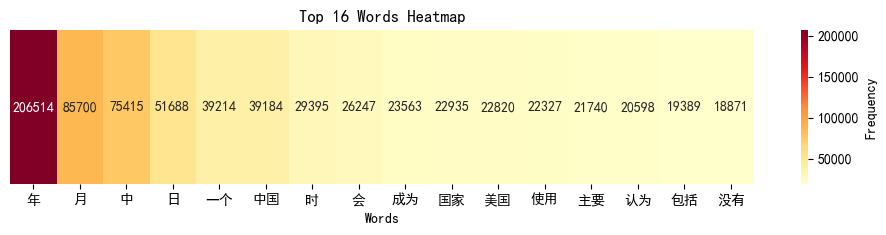

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# 设置 Matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def get_top_16_words(nested_list):
    """
    统计嵌套列表中出现最多的前 16 个词。
    
    参数:
    nested_list (list): 包含子列表的嵌套列表，子列表中的元素是中文词。
    
    返回:
    list: 出现最多的前 16 个词的列表。
    list: 包含词和频率的元组列表。
    """
    # 将嵌套列表展平
    words = [word for sublist in nested_list for word in sublist]
    
    # 统计每个词的频率
    word_counts = Counter(words)
    
    # 获取出现次数最多的前 16 个词
    top_16_words = word_counts.most_common(16)
    
    # 将结果存入列表
    top_words_list = [word for word, count in top_16_words]
    
    return top_words_list, top_16_words

def plot_heatmap(top_16_words):
    """
    绘制热力图，展示前 16 个词的频率。
    
    参数:
    top_16_words (list): 包含词和频率的元组列表。
    """
    # 提取词和频率
    words = [word for word, count in top_16_words]
    counts = [count for word, count in top_16_words]
    
    # 创建热力图数据
    heatmap_data = np.array([counts])  # 热力图数据是一行
    
    # 绘制热力图
    plt.figure(figsize=(12, 2))
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", 
                xticklabels=words, yticklabels=False, cbar_kws={'label': 'Frequency'})
    
    plt.title("Top 16 Words Heatmap")
    plt.xlabel("Words")
    plt.show()



top_words_list, top_16_words = get_top_16_words(contents)

# 输出结果
print("Top 16 words:", top_words_list)

# 绘制热力图
plot_heatmap(top_16_words)

In [13]:
import math
from collections import Counter

def calculate_unigram_entropy(segmented_list):
    # 初始化一个空列表来存储每个子列表的信息熵
    entropy_list = []
    
    # 初始化整体统计变量
    total_words_all = 0  # 所有子列表的总分词个数
    word_counts_all = Counter()  # 所有子列表的词频统计
    
    # 遍历每个子列表
    for sublist in segmented_list:
        # 统计词频
        word_counts = Counter(sublist)
        total_words = len(sublist)
        
        # 计算每个词的概率
        probabilities = {word: count / total_words for word, count in word_counts.items()}
        
        # 计算信息熵
        entropy = -sum(p * math.log2(p) for p in probabilities.values())
        entropy_list.append(entropy)
        
        # 更新整体统计变量
        total_words_all += total_words
        word_counts_all.update(word_counts)
    
    # 计算整体信息熵
    overall_probabilities = {word: count / total_words_all for word, count in word_counts_all.items()}
    overall_entropy = -sum(p * math.log2(p) for p in overall_probabilities.values())
    
    return entropy_list, overall_entropy


entropy_list, overall_entropy = calculate_unigram_entropy(contents)

# 输出每个子列表的信息熵
for i, entropy in enumerate(entropy_list):
    print(f"文本 {i + 1} 的信息熵: {entropy:.4f}")

# 输出整体信息熵
print(f"所有文本的整体信息熵: {overall_entropy:.4f}")

df = insert_data_to_column(df,entropy_list,"unigram entropy")
df.head()

文本 1 的信息熵: 12.5542
文本 2 的信息熵: 12.6127
文本 3 的信息熵: 12.7061
文本 4 的信息熵: 12.9277
文本 5 的信息熵: 13.1692
文本 6 的信息熵: 12.7051
文本 7 的信息熵: 12.8883
文本 8 的信息熵: 12.7307
文本 9 的信息熵: 12.8338
文本 10 的信息熵: 12.6087
文本 11 的信息熵: 13.0372
文本 12 的信息熵: 12.9647
文本 13 的信息熵: 12.6414
文本 14 的信息熵: 12.8164
文本 15 的信息熵: 12.9779
文本 16 的信息熵: 12.7222
文本 17 的信息熵: 12.9137
文本 18 的信息熵: 12.7505
文本 19 的信息熵: 12.9919
文本 20 的信息熵: 12.8273
文本 21 的信息熵: 12.9388
文本 22 的信息熵: 13.0534
文本 23 的信息熵: 12.8317
文本 24 的信息熵: 13.0744
文本 25 的信息熵: 12.8490
文本 26 的信息熵: 12.6984
文本 27 的信息熵: 12.7957
文本 28 的信息熵: 13.0879
文本 29 的信息熵: 13.2461
文本 30 的信息熵: 12.8881
文本 31 的信息熵: 12.8682
文本 32 的信息熵: 12.9034
文本 33 的信息熵: 12.8468
文本 34 的信息熵: 13.1086
文本 35 的信息熵: 13.0875
文本 36 的信息熵: 12.9957
文本 37 的信息熵: 13.1048
文本 38 的信息熵: 12.7976
文本 39 的信息熵: 13.2551
文本 40 的信息熵: 12.8436
文本 41 的信息熵: 12.8969
文本 42 的信息熵: 12.8791
文本 43 的信息熵: 12.9518
文本 44 的信息熵: 12.9930
文本 45 的信息熵: 13.1411
文本 46 的信息熵: 12.9734
文本 47 的信息熵: 12.9697
文本 48 的信息熵: 13.0401
文本 49 的信息熵: 13.1298
文本 50 的信息熵: 13.0273
文本 51 的信息

,text serial,word segments,total character,average word length,unigram entropy,unigram perplexity,bigram entropy,bigram perplexity,trigram entropy,trigram perplexity
0,1,112752,244383,2.167438,12.554190,NaN,NaN,NaN,NaN,NaN
1,2,113767,254062,2.233178,12.612703,NaN,NaN,NaN,NaN,NaN
2,3,113349,247289,2.181660,12.706058,NaN,NaN,NaN,NaN,NaN
3,4,115079,244439,2.124097,12.927698,NaN,NaN,NaN,NaN,NaN
4,5,117997,247895,2.100858,13.169202,NaN,NaN,NaN,NaN,NaN


In [14]:
import math
from collections import Counter

def calculate_unigram_perplexity(segmented_list):
    # 初始化一个空列表来存储每个子列表的困惑度
    perplexity_list = []
    
    # 初始化整体统计变量
    total_words_all = 0  # 所有子列表的总分词个数
    word_counts_all = Counter()  # 所有子列表的词频统计
    
    # 遍历每个子列表
    for sublist in segmented_list:
        # 统计词频
        word_counts = Counter(sublist)
        total_words = len(sublist)
        
        # 计算每个词的概率
        probabilities = {word: count / total_words for word, count in word_counts.items()}
        
        # 计算困惑度
        log_sum = sum(math.log(probabilities[word]) for word in sublist)  # 使用自然对数
        entropy = -log_sum / total_words
        perplexity = math.exp(entropy)  # 使用 e 的指数计算困惑度
        perplexity_list.append(perplexity)
        
        # 更新整体统计变量
        total_words_all += total_words
        word_counts_all.update(word_counts)
    
    # 计算整体困惑度
    overall_probabilities = {word: count / total_words_all for word, count in word_counts_all.items()}
    overall_log_sum = sum(math.log(overall_probabilities[word]) for word in word_counts_all.elements())
    overall_entropy = -overall_log_sum / total_words_all
    overall_perplexity = math.exp(overall_entropy)
    
    return perplexity_list, overall_perplexity



perplexity_list, overall_perplexity = calculate_unigram_perplexity(contents)

# 输出每个子列表的困惑度
for i, perplexity in enumerate(perplexity_list):
    print(f"文本 {i + 1} 的困惑度: {perplexity:.4f}")

# 输出整体困惑度
print(f"所有文本的整体困惑度: {overall_perplexity:.4f}")

文本 1 的困惑度: 6014.3366
文本 2 的困惑度: 6263.2817
文本 3 的困惑度: 6681.9698
文本 4 的困惑度: 7791.5667
文本 5 的困惑度: 9211.3816
文本 6 的困惑度: 6677.7331
文本 7 的困惑度: 7581.4620
文本 8 的困惑度: 6797.2066
文本 9 的困惑度: 7300.6145
文本 10 的困惑度: 6246.0666
文本 11 的困惑度: 8405.7912
文本 12 的困惑度: 7993.8036
文本 13 的困惑度: 6389.3192
文本 14 的困惑度: 7213.0866
文本 15 的困惑度: 8067.5040
文本 16 的困惑度: 6757.3434
文本 17 的困惑度: 7716.2874
文本 18 的困惑度: 6891.1973
文本 19 的困惑度: 8146.2984
文本 20 的困惑度: 7267.5692
文本 21 的困惑度: 7851.5547
文本 22 的困惑度: 8501.0556
文本 23 的困惑度: 7290.0249
文本 24 的困惑度: 8625.5193
文本 25 的困惑度: 7377.7022
文本 26 的困惑度: 6646.7505
文本 27 的困惑度: 7110.1581
文本 28 的困惑度: 8706.5548
文本 29 的困惑度: 9715.6727
文本 30 的困惑度: 7580.6715
文本 31 的困惑度: 7476.8965
文本 32 的困惑度: 7661.6150
文本 33 的困惑度: 7366.8651
文本 34 的困惑度: 8832.4283
文本 35 的困惑度: 8704.2443
文本 36 的困惑度: 8167.5768
文本 37 的困惑度: 8808.9835
文本 38 的困惑度: 7119.8269
文本 39 的困惑度: 9776.2898
文本 40 的困惑度: 7350.2397
文本 41 的困惑度: 7626.9225
文本 42 的困惑度: 7533.7314
文本 43 的困惑度: 7922.6515
文本 44 的困惑度: 8152.3928
文本 45 的困惑度: 9033.4037
文本 46 的困惑度: 8042.09

In [15]:
df = insert_data_to_column(df,perplexity_list,"unigram perplexity")
df.head()

,text serial,word segments,total character,average word length,unigram entropy,unigram perplexity,bigram entropy,bigram perplexity,trigram entropy,trigram perplexity
0,1,112752,244383,2.167438,12.554190,6014.336614,NaN,NaN,NaN,NaN
1,2,113767,254062,2.233178,12.612703,6263.281655,NaN,NaN,NaN,NaN
2,3,113349,247289,2.181660,12.706058,6681.969775,NaN,NaN,NaN,NaN
3,4,115079,244439,2.124097,12.927698,7791.566740,NaN,NaN,NaN,NaN
4,5,117997,247895,2.100858,13.169202,9211.381582,NaN,NaN,NaN,NaN


In [16]:
import math
from collections import defaultdict, Counter

def calculate_bigram_entropy(segmented_list):
    # 初始化一个空列表来存储每个子列表的信息熵
    entropy_list = []
    
    # 初始化整体统计变量
    total_bigrams_all = 0  # 所有子列表的总 bigram 个数
    bigram_counts_all = defaultdict(Counter)  # 所有子列表的 bigram 统计
    unigram_counts_all = Counter()  # 所有子列表的 unigram 统计
    
    # 遍历每个子列表
    for sublist in segmented_list:
        # 统计 bigram 和 unigram
        bigram_counts = defaultdict(Counter)
        unigram_counts = Counter(sublist)
        total_bigrams = max(0, len(sublist) - 1)  # bigram 个数为 len(sublist) - 1
        
        # 更新 bigram 统计
        for i in range(1, len(sublist)):
            prev_word = sublist[i - 1]
            curr_word = sublist[i]
            bigram_counts[prev_word][curr_word] += 1
        
        # 计算信息熵
        entropy = 0
        for i in range(1, len(sublist)):
            prev_word = sublist[i - 1]
            curr_word = sublist[i]
            # 计算条件概率 P(curr_word | prev_word)
            if bigram_counts[prev_word][curr_word] > 0 and unigram_counts[prev_word] > 0:
                prob = bigram_counts[prev_word][curr_word] / unigram_counts[prev_word]
                entropy -= math.log2(prob)  # 使用 log2 计算信息熵
        entropy /= total_bigrams if total_bigrams > 0 else 1  # 平均信息熵
        
        entropy_list.append(entropy)
        
        # 更新整体统计变量
        total_bigrams_all += total_bigrams
        for prev_word, counts in bigram_counts.items():
            bigram_counts_all[prev_word].update(counts)
        unigram_counts_all.update(unigram_counts)
    
    # 计算整体信息熵
    overall_entropy = 0
    for prev_word, counts in bigram_counts_all.items():
        for curr_word, count in counts.items():
            # 计算联合概率 P(prev_word, curr_word)
            joint_prob = count / total_bigrams_all
            # 计算条件概率 P(curr_word | prev_word)
            cond_prob = count / unigram_counts_all[prev_word]
            # 计算熵
            overall_entropy -= joint_prob * math.log2(cond_prob)  # 使用 log2 计算信息熵
    
    return entropy_list, overall_entropy


entropy_list, overall_entropy = calculate_bigram_entropy(contents)

# 输出每个子列表的信息熵
for i, entropy in enumerate(entropy_list):
    print(f"文本 {i + 1} 的信息熵: {entropy:.4f}")

# 输出整体信息熵
print(f"所有文本的整体信息熵: {overall_entropy:.4f}")

文本 1 的信息熵: 3.8275
文本 2 的信息熵: 3.6790
文本 3 的信息熵: 3.5848
文本 4 的信息熵: 3.4816
文本 5 的信息熵: 3.3455
文本 6 的信息熵: 3.6633
文本 7 的信息熵: 3.5195
文本 8 的信息熵: 3.6093
文本 9 的信息熵: 3.5126
文本 10 的信息熵: 3.6362
文本 11 的信息熵: 3.3847
文本 12 的信息熵: 3.4706
文本 13 的信息熵: 3.6530
文本 14 的信息熵: 3.5262
文本 15 的信息熵: 3.4321
文本 16 的信息熵: 3.6082
文本 17 的信息熵: 3.4199
文本 18 的信息熵: 3.5880
文本 19 的信息熵: 3.4123
文本 20 的信息熵: 3.4923
文本 21 的信息熵: 3.4532
文本 22 的信息熵: 3.3830
文本 23 的信息熵: 3.5239
文本 24 的信息熵: 3.3774
文本 25 的信息熵: 3.5223
文本 26 的信息熵: 3.5500
文本 27 的信息熵: 3.5087
文本 28 的信息熵: 3.2514
文本 29 的信息熵: 3.2121
文本 30 的信息熵: 3.4889
文本 31 的信息熵: 3.4559
文本 32 的信息熵: 3.2618
文本 33 的信息熵: 2.9027
文本 34 的信息熵: 3.2119
文本 35 的信息熵: 3.3007
文本 36 的信息熵: 3.3728
文本 37 的信息熵: 3.3066
文本 38 的信息熵: 3.4400
文本 39 的信息熵: 3.2215
文本 40 的信息熵: 3.4380
文本 41 的信息熵: 3.4913
文本 42 的信息熵: 3.4449
文本 43 的信息熵: 3.3439
文本 44 的信息熵: 3.3730
文本 45 的信息熵: 3.2890
文本 46 的信息熵: 3.3506
文本 47 的信息熵: 3.3797
文本 48 的信息熵: 3.3286
文本 49 的信息熵: 3.2754
文本 50 的信息熵: 3.3417
文本 51 的信息熵: 3.2713
文本 52 的信息熵: 3.4472
文本 53 的信息熵: 3.3119
文本

In [17]:
df = insert_data_to_column(df,entropy_list,"bigram entropy")
df.head()

,text serial,word segments,total character,average word length,unigram entropy,unigram perplexity,bigram entropy,bigram perplexity,trigram entropy,trigram perplexity
0,1,112752,244383,2.167438,12.554190,6014.336614,3.827516,NaN,NaN,NaN
1,2,113767,254062,2.233178,12.612703,6263.281655,3.679033,NaN,NaN,NaN
2,3,113349,247289,2.181660,12.706058,6681.969775,3.584769,NaN,NaN,NaN
3,4,115079,244439,2.124097,12.927698,7791.566740,3.481620,NaN,NaN,NaN
4,5,117997,247895,2.100858,13.169202,9211.381582,3.345465,NaN,NaN,NaN


In [18]:
import math
from collections import defaultdict, Counter

def calculate_bigram_perplexity(segmented_list):
    # 初始化一个空列表来存储每个子列表的困惑度
    perplexity_list = []
    
    # 初始化整体统计变量
    total_bigrams_all = 0  # 所有子列表的总 bigram 个数
    bigram_counts_all = defaultdict(Counter)  # 所有子列表的 bigram 统计
    unigram_counts_all = Counter()  # 所有子列表的 unigram 统计
    
    # 遍历每个子列表
    for sublist in segmented_list:
        # 统计 bigram 和 unigram
        bigram_counts = defaultdict(Counter)
        unigram_counts = Counter(sublist)
        total_bigrams = max(0, len(sublist) - 1)  # bigram 个数为 len(sublist) - 1
        
        # 更新 bigram 统计
        for i in range(1, len(sublist)):
            prev_word = sublist[i - 1]
            curr_word = sublist[i]
            bigram_counts[prev_word][curr_word] += 1
        
        # 计算困惑度
        log_sum = 0
        for i in range(1, len(sublist)):
            prev_word = sublist[i - 1]
            curr_word = sublist[i]
            # 计算条件概率 P(curr_word | prev_word)
            if bigram_counts[prev_word][curr_word] > 0 and unigram_counts[prev_word] > 0:
                prob = bigram_counts[prev_word][curr_word] / unigram_counts[prev_word]
                log_sum += math.log(prob)  # 使用自然对数
        entropy = -log_sum / total_bigrams if total_bigrams > 0 else 0
        perplexity = math.exp(entropy)  # 使用 e 的指数计算困惑度
        perplexity_list.append(perplexity)
        
        # 更新整体统计变量
        total_bigrams_all += total_bigrams
        for prev_word, counts in bigram_counts.items():
            bigram_counts_all[prev_word].update(counts)
        unigram_counts_all.update(unigram_counts)
    
    # 计算整体困惑度
    overall_log_sum = 0
    for prev_word, counts in bigram_counts_all.items():
        for curr_word, count in counts.items():
            # 计算条件概率 P(curr_word | prev_word)
            if unigram_counts_all[prev_word] > 0:
                prob = count / unigram_counts_all[prev_word]
                overall_log_sum += count * math.log(prob)  # 使用自然对数
    overall_entropy = -overall_log_sum / total_bigrams_all if total_bigrams_all > 0 else 0
    overall_perplexity = math.exp(overall_entropy)  # 使用 e 的指数计算困惑度
    
    return perplexity_list, overall_perplexity



perplexity_list, overall_perplexity = calculate_bigram_perplexity(contents)

# 输出每个子列表的困惑度
for i, perplexity in enumerate(perplexity_list):
    print(f"子列表 {i + 1} 的困惑度: {perplexity:.4f}")

# 输出整体困惑度
print(f"所有子列表的整体困惑度: {overall_perplexity:.4f}")

子列表 1 的困惑度: 14.1970
子列表 2 的困惑度: 12.8085
子列表 3 的困惑度: 11.9984
子列表 4 的困惑度: 11.1705
子列表 5 的困惑度: 10.1645
子列表 6 的困惑度: 12.6696
子列表 7 的困惑度: 11.4673
子列表 8 的困惑度: 12.2038
子列表 9 的困惑度: 11.4130
子列表 10 的困惑度: 12.4336
子列表 11 的困惑度: 10.4449
子列表 12 的困惑度: 11.0857
子列表 13 的困惑度: 12.5797
子列表 14 的困惑度: 11.5210
子列表 15 的困惑度: 10.7939
子列表 16 的困惑度: 12.1950
子列表 17 的困惑度: 10.7026
子列表 18 的困惑度: 12.0252
子列表 19 的困惑度: 10.6461
子列表 20 的困惑度: 11.2534
子列表 21 的困惑度: 10.9524
子列表 22 的困惑度: 10.4323
子列表 23 的困惑度: 11.5030
子列表 24 的困惑度: 10.3920
子列表 25 的困惑度: 11.4897
子列表 26 的困惑度: 11.7129
子列表 27 的困惑度: 11.3823
子列表 28 的困惑度: 9.5231
子列表 29 的困惑度: 9.2671
子列表 30 的困惑度: 11.2267
子列表 31 的困惑度: 10.9734
子列表 32 的困惑度: 9.5916
子列表 33 的困惑度: 7.4784
子列表 34 的困惑度: 9.2658
子列表 35 的困惑度: 9.8539
子列表 36 的困惑度: 10.3590
子列表 37 的困惑度: 9.8942
子列表 38 的困惑度: 10.8529
子列表 39 的困惑度: 9.3274
子列表 40 的困惑度: 10.8382
子列表 41 的困惑度: 11.2454
子列表 42 的困惑度: 10.8895
子列表 43 的困惑度: 10.1533
子列表 44 的困惑度: 10.3600
子列表 45 的困惑度: 9.7743
子列表 46 的困惑度: 10.2006
子列表 47 的困惑度: 10.4088
子列表 48 的困惑度: 10.0462
子列表 49 的困惑

In [19]:
df = insert_data_to_column(df,perplexity_list,"bigram perplexity")
df.head()

,text serial,word segments,total character,average word length,unigram entropy,unigram perplexity,bigram entropy,bigram perplexity,trigram entropy,trigram perplexity
0,1,112752,244383,2.167438,12.554190,6014.336614,3.827516,14.197014,NaN,NaN
1,2,113767,254062,2.233178,12.612703,6263.281655,3.679033,12.808530,NaN,NaN
2,3,113349,247289,2.181660,12.706058,6681.969775,3.584769,11.998391,NaN,NaN
3,4,115079,244439,2.124097,12.927698,7791.566740,3.481620,11.170483,NaN,NaN
4,5,117997,247895,2.100858,13.169202,9211.381582,3.345465,10.164482,NaN,NaN


In [20]:
import math
from collections import defaultdict, Counter

def calculate_trigram_entropy(segmented_list):
    """
    计算每个子列表的 trigram 信息熵以及所有子列表的整体信息熵。

    参数:
        segmented_list (list): 包含分词结果的列表，每个元素是一个子列表。

    返回:
        tuple: 两个列表，第一个是每个子列表的信息熵，第二个是所有子列表的整体信息熵。
    """
    # 初始化一个空列表来存储每个子列表的信息熵
    entropy_list = []
    
    # 初始化整体统计变量
    total_trigrams_all = 0  # 所有子列表的总 trigram 个数
    trigram_counts_all = defaultdict(lambda: defaultdict(Counter))  # 所有子列表的 trigram 统计
    bigram_counts_all = defaultdict(Counter)  # 所有子列表的 bigram 统计
    
    # 遍历每个子列表
    for sublist in segmented_list:
        # 统计 trigram 和 bigram
        trigram_counts = defaultdict(lambda: defaultdict(Counter))
        bigram_counts = defaultdict(Counter)
        total_trigrams = max(0, len(sublist) - 2)  # trigram 个数为 len(sublist) - 2
        
        # 更新 trigram 和 bigram 统计
        for i in range(2, len(sublist)):
            prev_prev_word = sublist[i - 2]
            prev_word = sublist[i - 1]
            curr_word = sublist[i]
            trigram_counts[prev_prev_word][prev_word][curr_word] += 1
            bigram_counts[prev_prev_word][prev_word] += 1
        
        # 计算信息熵
        entropy = 0
        for i in range(2, len(sublist)):
            prev_prev_word = sublist[i - 2]
            prev_word = sublist[i - 1]
            curr_word = sublist[i]
            # 计算条件概率 P(curr_word | prev_prev_word, prev_word)
            if (trigram_counts[prev_prev_word][prev_word][curr_word] > 0 and
                bigram_counts[prev_prev_word][prev_word] > 0):
                prob = (trigram_counts[prev_prev_word][prev_word][curr_word] /
                        bigram_counts[prev_prev_word][prev_word])
                entropy -= math.log2(prob)  # 使用 log2 计算信息熵
        entropy /= total_trigrams if total_trigrams > 0 else 1  # 平均信息熵
        
        entropy_list.append(entropy)
        
        # 更新整体统计变量
        total_trigrams_all += total_trigrams
        for prev_prev_word, counts in trigram_counts.items():
            for prev_word, sub_counts in counts.items():
                trigram_counts_all[prev_prev_word][prev_word].update(sub_counts)
                bigram_counts_all[prev_prev_word][prev_word] += sum(sub_counts.values())
    
    # 计算整体信息熵
    overall_entropy = 0
    for prev_prev_word, counts in trigram_counts_all.items():
        for prev_word, sub_counts in counts.items():
            for curr_word, count in sub_counts.items():
                # 计算联合概率 P(prev_prev_word, prev_word, curr_word)
                joint_prob = count / total_trigrams_all
                # 计算条件概率 P(curr_word | prev_prev_word, prev_word)
                cond_prob = count / bigram_counts_all[prev_prev_word][prev_word]
                # 计算熵
                overall_entropy -= joint_prob * math.log2(cond_prob)  # 使用 log2 计算信息熵
    
    return entropy_list, overall_entropy


entropy_list, overall_entropy = calculate_trigram_entropy(contents)

# 输出每个子列表的信息熵
for i, entropy in enumerate(entropy_list):
    print(f"子列表 {i + 1} 的信息熵: {entropy:.4f}")

# 输出整体信息熵
print(f"所有子列表的整体信息熵: {overall_entropy:.4f}")

子列表 1 的信息熵: 0.3402
子列表 2 的信息熵: 0.3964
子列表 3 的信息熵: 0.3929
子列表 4 的信息熵: 0.3237
子列表 5 的信息熵: 0.2683
子列表 6 的信息熵: 0.3407
子列表 7 的信息熵: 0.3122
子列表 8 的信息熵: 0.3439
子列表 9 的信息熵: 0.3423
子列表 10 的信息熵: 0.3771
子列表 11 的信息熵: 0.2931
子列表 12 的信息熵: 0.3293
子列表 13 的信息熵: 0.3828
子列表 14 的信息熵: 0.3359
子列表 15 的信息熵: 0.3154
子列表 16 的信息熵: 0.3781
子列表 17 的信息熵: 0.3484
子列表 18 的信息熵: 0.3691
子列表 19 的信息熵: 0.3269
子列表 20 的信息熵: 0.3281
子列表 21 的信息熵: 0.3435
子列表 22 的信息熵: 0.2977
子列表 23 的信息熵: 0.3249
子列表 24 的信息熵: 0.3056
子列表 25 的信息熵: 0.3422
子列表 26 的信息熵: 0.3986
子列表 27 的信息熵: 0.3788
子列表 28 的信息熵: 0.3187
子列表 29 的信息熵: 0.2843
子列表 30 的信息熵: 0.3310
子列表 31 的信息熵: 0.3548
子列表 32 的信息熵: 0.4056
子列表 33 的信息熵: 0.2845
子列表 34 的信息熵: 0.3178
子列表 35 的信息熵: 0.3183
子列表 36 的信息熵: 0.3161
子列表 37 的信息熵: 0.3087
子列表 38 的信息熵: 0.3714
子列表 39 的信息熵: 0.2637
子列表 40 的信息熵: 0.3646
子列表 41 的信息熵: 0.3328
子列表 42 的信息熵: 0.3275
子列表 43 的信息熵: 0.4034
子列表 44 的信息熵: 0.3363
子列表 45 的信息熵: 0.2948
子列表 46 的信息熵: 0.3827
子列表 47 的信息熵: 0.3311
子列表 48 的信息熵: 0.3155
子列表 49 的信息熵: 0.3123
子列表 50 的信息熵: 0.3147
子列表 51 的信

In [21]:
df = insert_data_to_column(df,entropy_list,"trigram entropy")
df.head()

,text serial,word segments,total character,average word length,unigram entropy,unigram perplexity,bigram entropy,bigram perplexity,trigram entropy,trigram perplexity
0,1,112752,244383,2.167438,12.554190,6014.336614,3.827516,14.197014,0.340210,NaN
1,2,113767,254062,2.233178,12.612703,6263.281655,3.679033,12.808530,0.396384,NaN
2,3,113349,247289,2.181660,12.706058,6681.969775,3.584769,11.998391,0.392907,NaN
3,4,115079,244439,2.124097,12.927698,7791.566740,3.481620,11.170483,0.323728,NaN
4,5,117997,247895,2.100858,13.169202,9211.381582,3.345465,10.164482,0.268252,NaN


In [22]:
import math
from collections import defaultdict, Counter

def calculate_trigram_perplexity(segmented_list):
    """
    计算每个子列表的 trigram 困惑度以及所有子列表的整体困惑度。

    参数:
        segmented_list (list): 包含分词结果的列表，每个元素是一个子列表。

    返回:
        tuple: 两个列表，第一个是每个子列表的困惑度，第二个是所有子列表的整体困惑度。
    """
    # 初始化一个空列表来存储每个子列表的困惑度
    perplexity_list = []
    
    # 初始化整体统计变量
    total_trigrams_all = 0  # 所有子列表的总 trigram 个数
    trigram_counts_all = defaultdict(lambda: defaultdict(Counter))  # 所有子列表的 trigram 统计
    bigram_counts_all = defaultdict(Counter)  # 所有子列表的 bigram 统计
    
    # 遍历每个子列表
    for sublist in segmented_list:
        # 统计 trigram 和 bigram
        trigram_counts = defaultdict(lambda: defaultdict(Counter))
        bigram_counts = defaultdict(Counter)
        total_trigrams = max(0, len(sublist) - 2)  # trigram 个数为 len(sublist) - 2
        
        # 更新 trigram 和 bigram 统计
        for i in range(2, len(sublist)):
            prev_prev_word = sublist[i - 2]
            prev_word = sublist[i - 1]
            curr_word = sublist[i]
            trigram_counts[prev_prev_word][prev_word][curr_word] += 1
            bigram_counts[prev_prev_word][prev_word] += 1
        
        # 计算困惑度
        log_sum = 0
        for i in range(2, len(sublist)):
            prev_prev_word = sublist[i - 2]
            prev_word = sublist[i - 1]
            curr_word = sublist[i]
            # 计算条件概率 P(curr_word | prev_prev_word, prev_word)
            if (trigram_counts[prev_prev_word][prev_word][curr_word] > 0 and
                bigram_counts[prev_prev_word][prev_word] > 0):
                prob = (trigram_counts[prev_prev_word][prev_word][curr_word] /
                        bigram_counts[prev_prev_word][prev_word])
                log_sum += math.log(prob)  # 使用自然对数
        entropy = -log_sum / total_trigrams if total_trigrams > 0 else 0
        perplexity = math.exp(entropy)  # 使用 e 的指数计算困惑度
        perplexity_list.append(perplexity)
        
        # 更新整体统计变量
        total_trigrams_all += total_trigrams
        for prev_prev_word, counts in trigram_counts.items():
            for prev_word, sub_counts in counts.items():
                trigram_counts_all[prev_prev_word][prev_word].update(sub_counts)
                bigram_counts_all[prev_prev_word][prev_word] += sum(sub_counts.values())
    
    # 计算整体困惑度
    overall_log_sum = 0
    for prev_prev_word, counts in trigram_counts_all.items():
        for prev_word, sub_counts in counts.items():
            for curr_word, count in sub_counts.items():
                # 计算条件概率 P(curr_word | prev_prev_word, prev_word)
                if bigram_counts_all[prev_prev_word][prev_word] > 0:
                    prob = count / bigram_counts_all[prev_prev_word][prev_word]
                    overall_log_sum += count * math.log(prob)  # 使用自然对数
    overall_entropy = -overall_log_sum / total_trigrams_all if total_trigrams_all > 0 else 0
    overall_perplexity = math.exp(overall_entropy)  # 使用 e 的指数计算困惑度
    
    return perplexity_list, overall_perplexity



perplexity_list, overall_perplexity = calculate_trigram_perplexity(contents)

# 输出每个子列表的困惑度
for i, perplexity in enumerate(perplexity_list):
    print(f"子列表 {i + 1} 的困惑度: {perplexity:.4f}")

# 输出整体困惑度
print(f"所有子列表的整体困惑度: {overall_perplexity:.4f}")

子列表 1 的困惑度: 1.2659
子列表 2 的困惑度: 1.3162
子列表 3 的困惑度: 1.3130
子列表 4 的困惑度: 1.2516
子列表 5 的困惑度: 1.2043
子列表 6 的困惑度: 1.2663
子列表 7 的困惑度: 1.2416
子列表 8 的困惑度: 1.2692
子列表 9 的困惑度: 1.2678
子列表 10 的困惑度: 1.2988
子列表 11 的困惑度: 1.2253
子列表 12 的困惑度: 1.2564
子列表 13 的困惑度: 1.3039
子列表 14 的困惑度: 1.2621
子列表 15 的困惑度: 1.2443
子列表 16 的困惑度: 1.2996
子列表 17 的困惑度: 1.2732
子列表 18 的困惑度: 1.2916
子列表 19 的困惑度: 1.2543
子列表 20 的困惑度: 1.2554
子列表 21 的困惑度: 1.2689
子列表 22 的困惑度: 1.2292
子列表 23 的困惑度: 1.2526
子列表 24 的困惑度: 1.2359
子列表 25 的困惑度: 1.2677
子列表 26 的困惑度: 1.3182
子列表 27 的困惑度: 1.3002
子列表 28 的困惑度: 1.2472
子列表 29 的困惑度: 1.2178
子列表 30 的困惑度: 1.2579
子列表 31 的困惑度: 1.2788
子列表 32 的困惑度: 1.3246
子列表 33 的困惑度: 1.2180
子列表 34 的困惑度: 1.2464
子列表 35 的困惑度: 1.2469
子列表 36 的困惑度: 1.2449
子列表 37 的困惑度: 1.2386
子列表 38 的困惑度: 1.2936
子列表 39 的困惑度: 1.2006
子列表 40 的困惑度: 1.2875
子列表 41 的困惑度: 1.2594
子列表 42 的困惑度: 1.2548
子列表 43 的困惑度: 1.3226
子列表 44 的困惑度: 1.2625
子列表 45 的困惑度: 1.2267
子列表 46 的困惑度: 1.3038
子列表 47 的困惑度: 1.2580
子列表 48 的困惑度: 1.2445
子列表 49 的困惑度: 1.2416
子列表 50 的困惑度: 1.2437
子列表 51 的困

In [23]:
df = insert_data_to_column(df,perplexity_list,"trigram perplexity")
df.head()

,text serial,word segments,total character,average word length,unigram entropy,unigram perplexity,bigram entropy,bigram perplexity,trigram entropy,trigram perplexity
0,1,112752,244383,2.167438,12.554190,6014.336614,3.827516,14.197014,0.340210,1.265941
1,2,113767,254062,2.233178,12.612703,6263.281655,3.679033,12.808530,0.396384,1.316205
2,3,113349,247289,2.181660,12.706058,6681.969775,3.584769,11.998391,0.392907,1.313036
3,4,115079,244439,2.124097,12.927698,7791.566740,3.481620,11.170483,0.323728,1.251561
4,5,117997,247895,2.100858,13.169202,9211.381582,3.345465,10.164482,0.268252,1.204348


In [24]:
import pandas as pd

# 假设你的DataFrame变量名为df（请自行替换）
# 示例创建测试DataFrame（可删除）

# 保存到Excel（自动添加.xlsx扩展名）
df.to_excel("dataframe.xlsx", index=False)  # index=False表示不保存行索引

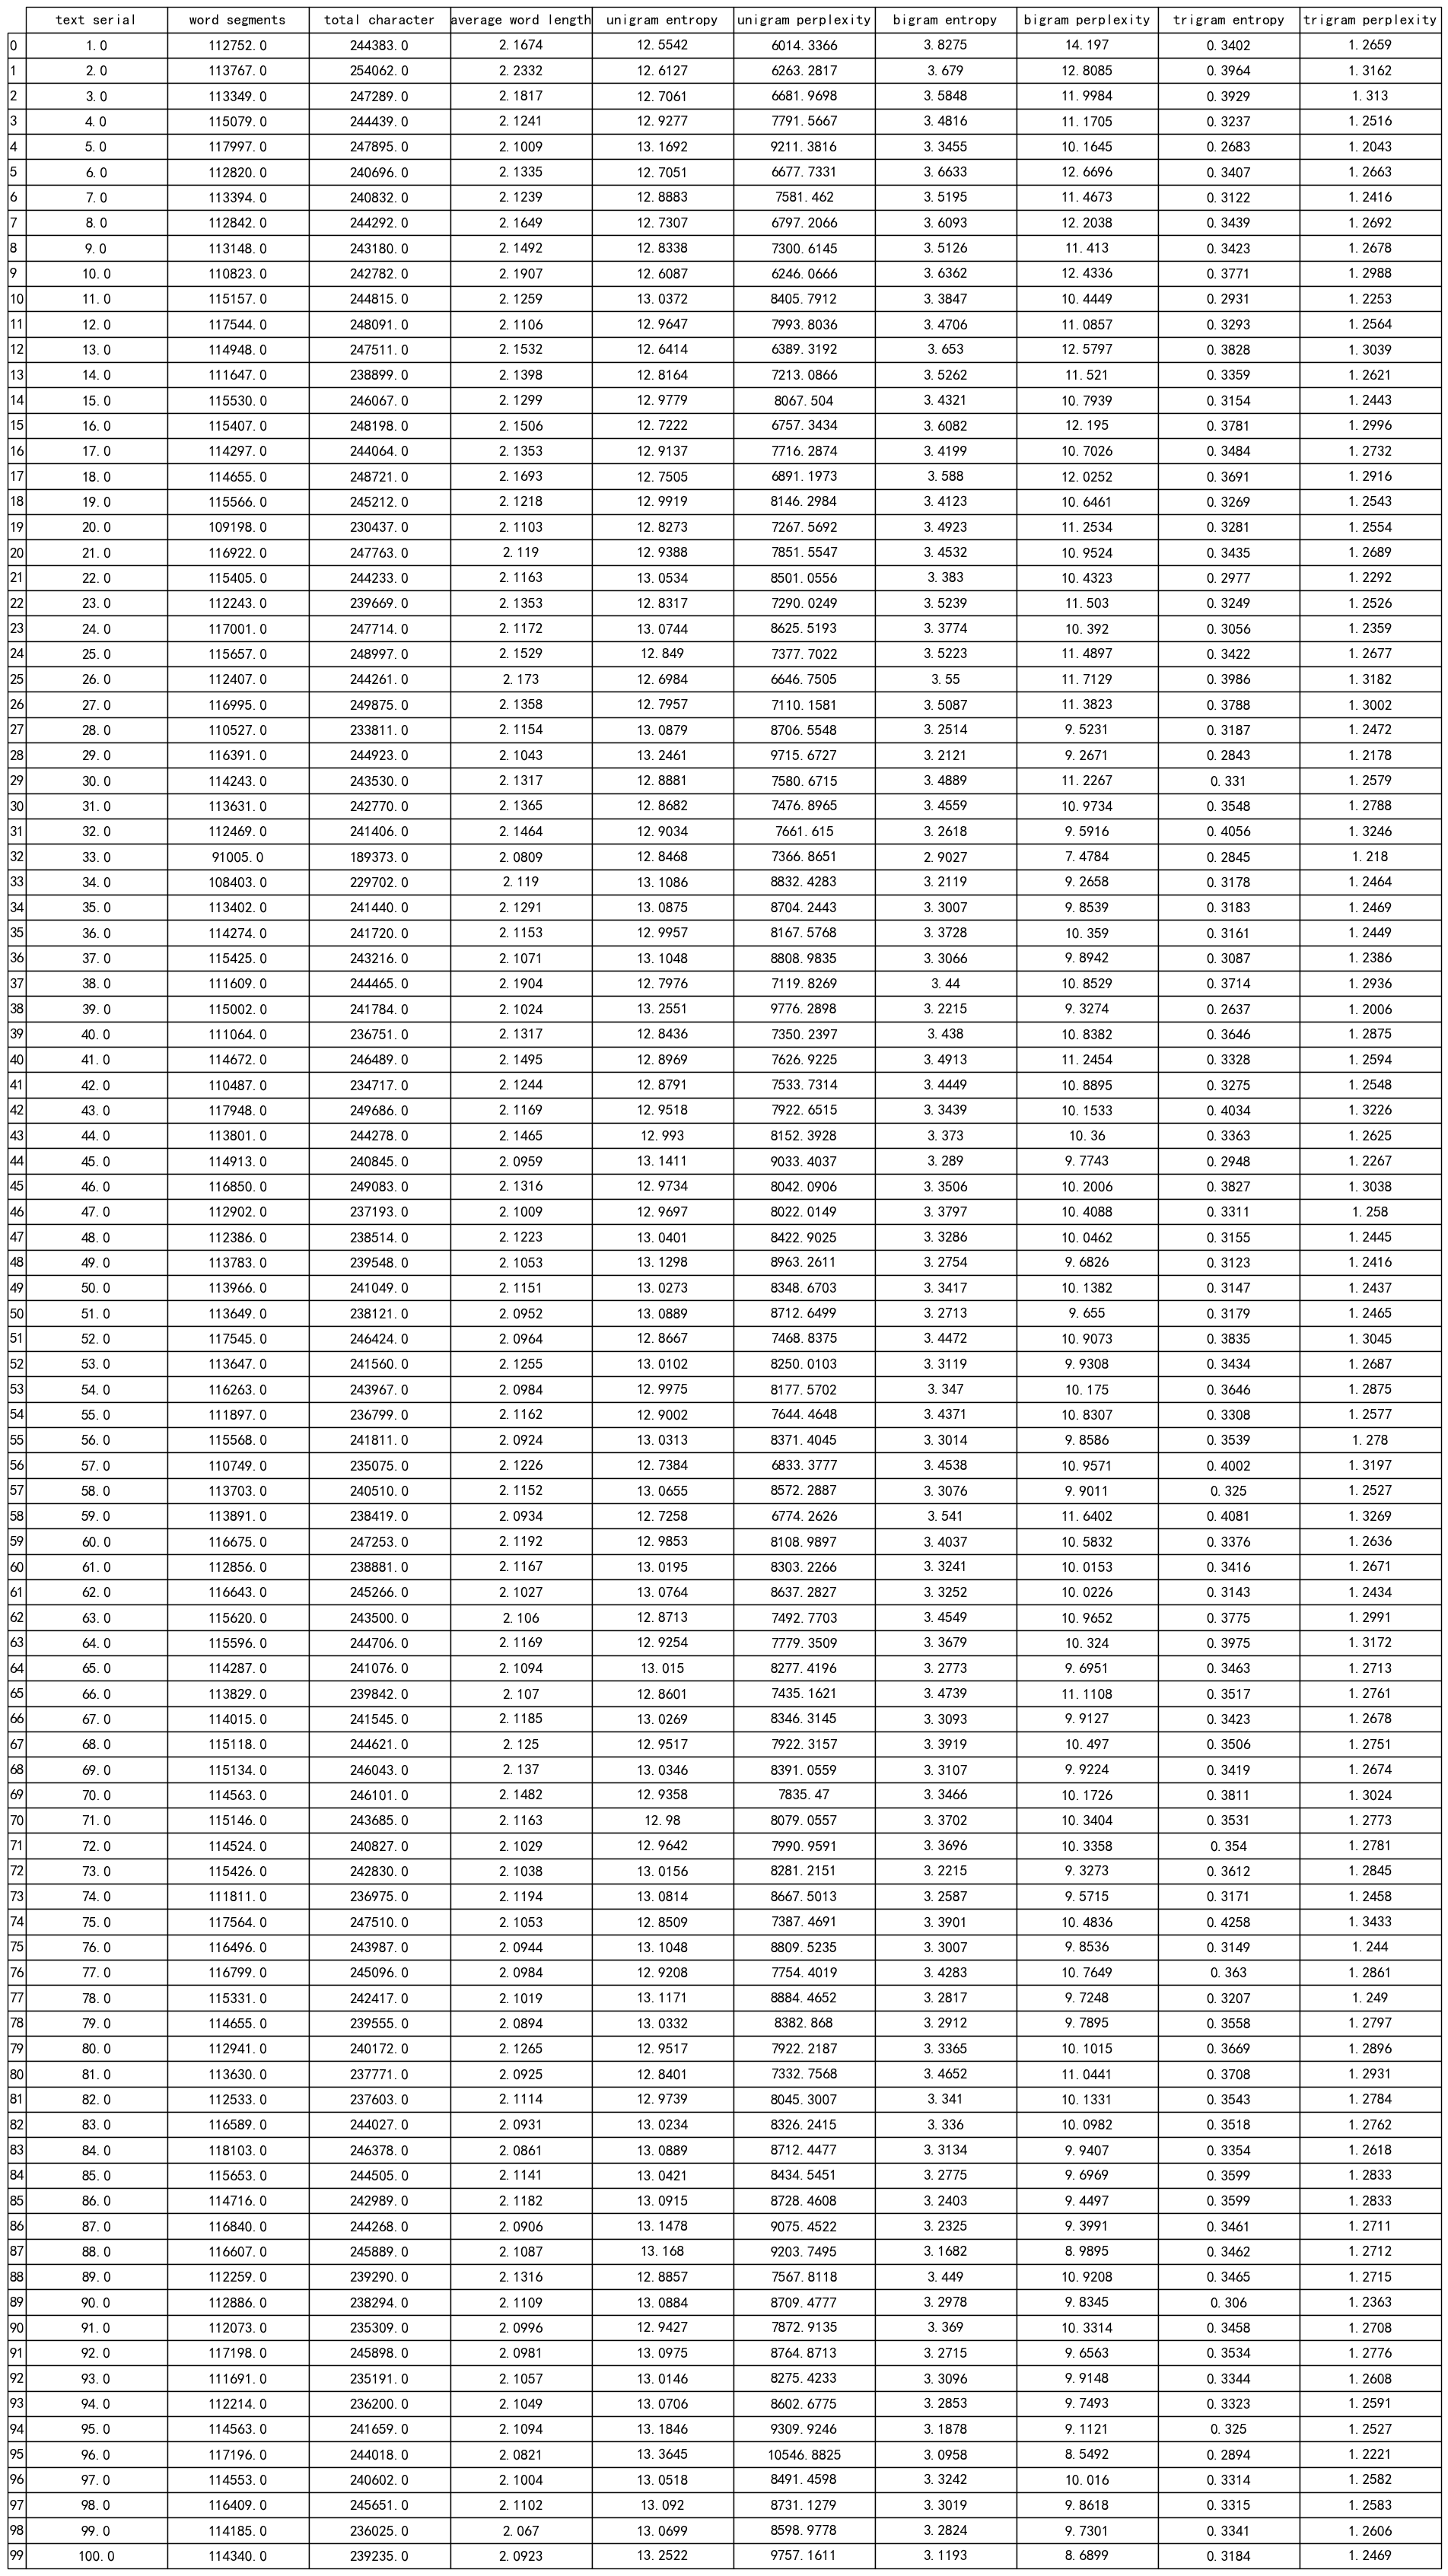

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# 假设你的DataFrame变量名为df（请自行替换）
# 示例创建测试DataFrame（可删除）
df=df.round(4)
df['text serial']=df['text serial'].astype(int)
df=df
# 创建画布
fig, ax = plt.subplots(figsize=(8, 4))  # 调整画布大小
ax.axis('off')  # 隐藏坐标轴

# 绘制表格
table = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))

# 美化表格样式
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 2)  # 调整表格大小

# 显示表格
plt.show()